# 1:Importing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

from IPython.core.display  import HTML
from IPython.display       import Image
from datetime              import date
from tabulate              import tabulate
from scipy.stats           import chi2_contingency

from boruta                import BorutaPy
from sklearn.ensemble      import RandomForestRegressor

from sklearn.metrics       import mean_absolute_error, mean_squared_error
from sklearn.linear_model  import LinearRegression, Lasso
from sklearn.ensemble      import RandomForestRegressor
import xgboost as xgb
from statsmodels.graphics.tsaplots import plot_acf
import random
import warnings
warnings.filterwarnings( 'ignore' )

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal =sns.color_palette()
plt.style.use('fivethirtyeight')

In [4]:
df= pd.read_csv( "C:\\Users\\govin\\Downloads\\PJMW_MW_Hourly.csv",low_memory=False,encoding = "ISO-8859-1")
df

,ï»¿Datetime,PJMW_MW
0,2002-12-31 1:00:00,5077
1,2002-12-31 2:00:00,4939
2,2002-12-31 3:00:00,4885
3,2002-12-31 4:00:00,4857
4,2002-12-31 5:00:00,4930
...,...,...
143201,2018-01-01 20:00:00,8401
143202,2018-01-01 21:00:00,8373
143203,2018-01-01 22:00:00,8238
143204,2018-01-01 23:00:00,7958


In [5]:
df = df.rename(columns={'ï»¿Datetime': 'Datetime', 'PJMW_MW': 'energyconsumption'})
df


,Datetime,energyconsumption
0,2002-12-31 1:00:00,5077
1,2002-12-31 2:00:00,4939
2,2002-12-31 3:00:00,4885
3,2002-12-31 4:00:00,4857
4,2002-12-31 5:00:00,4930
...,...,...
143201,2018-01-01 20:00:00,8401
143202,2018-01-01 21:00:00,8373
143203,2018-01-01 22:00:00,8238
143204,2018-01-01 23:00:00,7958


In [6]:
df["energyconsumption"].value_counts()

5346    84
5305    82
5234    82
5274    82
5217    81
        ..
2630     1
2600     1
2586     1
2574     1
8401     1
Name: energyconsumption, Length: 5343, dtype: int64

# Exploratory Data Analysis

In [7]:
df.dtypes

Datetime             object
energyconsumption     int64
dtype: object

We see that the Date coulumn of our data is a object datatype ,thus we need to convert it into Date time format. This can be done using to_datetime()

In [8]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.dtypes

Datetime             datetime64[ns]
energyconsumption             int64
dtype: object

In [9]:
df.isna().sum()

Datetime             0
energyconsumption    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Datetime           143206 non-null  datetime64[ns]
 1   energyconsumption  143206 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 MB


In [11]:
df.describe()

,energyconsumption
count,143206.000000
mean,5602.375089
std,979.142872
min,487.000000
25%,4907.000000
50%,5530.000000
75%,6252.000000
max,9594.000000


In [12]:
#setting Datetime as index 
df=df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [13]:
print(df.shape)

(143206, 1)


there are 143206 rows and 1 column #since we converted Datetime as index

In [14]:
df.tail()

,energyconsumption
Datetime,
2018-01-01 20:00:00,8401
2018-01-01 21:00:00,8373
2018-01-01 22:00:00,8238
2018-01-01 23:00:00,7958
2018-01-02 00:00:00,7691


In [15]:
df.head()

,energyconsumption
Datetime,
2002-12-31 01:00:00,5077
2002-12-31 02:00:00,4939
2002-12-31 03:00:00,4885
2002-12-31 04:00:00,4857
2002-12-31 05:00:00,4930


#the data is from 2002 to 2018, that means we have 17 years of data

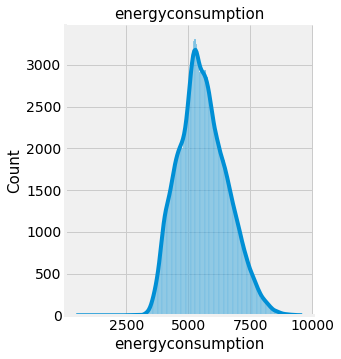

In [16]:
#create the displot
sns.displot(df["energyconsumption"],
           kde = True)
#label the axis
plt.xlabel("energyconsumption", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("energyconsumption", fontsize = 15)
plt.show()


In [17]:
energyconsumption_3000 = df[df["energyconsumption"] < 3000]
energyconsumption_3000

,energyconsumption
Datetime,
2003-05-29 00:00:00,487
2012-04-01 02:00:00,2977
2012-04-01 03:00:00,2992
2012-04-01 06:00:00,2955
2012-04-01 07:00:00,2942
2012-04-01 08:00:00,2936
2012-04-01 13:00:00,2878
2012-04-01 14:00:00,2721
2012-04-01 15:00:00,2663


In [18]:
energyconsumption_8000 = df[df["energyconsumption"] > 8000]
energyconsumption_8000

,energyconsumption
Datetime,
2002-08-22 17:00:00,8002
2002-08-14 14:00:00,8062
2002-08-14 15:00:00,8158
2002-08-14 16:00:00,8193
2002-08-14 17:00:00,8210
...,...
2018-01-01 18:00:00,8213
2018-01-01 19:00:00,8328
2018-01-01 20:00:00,8401


In [19]:
#calculate the Z score
df["energyconsumption_z"] = (df["energyconsumption"] - df["energyconsumption"].mean())/df["energyconsumption"].std()
df["energyconsumption_z"]

Datetime
2002-12-31 01:00:00   -0.536566
2002-12-31 02:00:00   -0.677506
2002-12-31 03:00:00   -0.732656
2002-12-31 04:00:00   -0.761253
2002-12-31 05:00:00   -0.686698
                         ...   
2018-01-01 20:00:00    2.858240
2018-01-01 21:00:00    2.829643
2018-01-01 22:00:00    2.691767
2018-01-01 23:00:00    2.405803
2018-01-02 00:00:00    2.133116
Name: energyconsumption_z, Length: 143206, dtype: float64

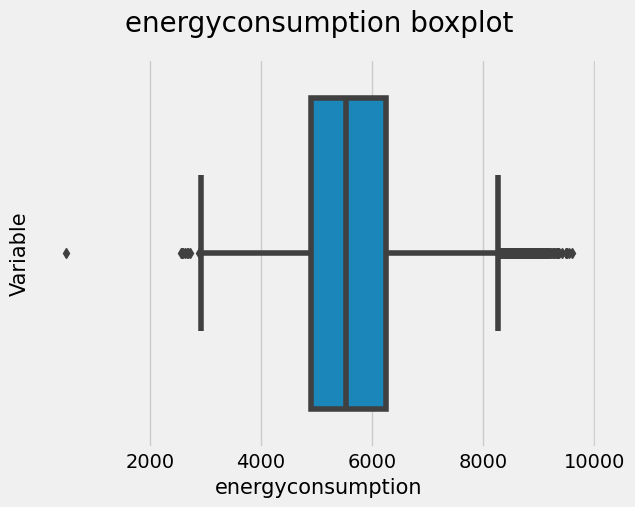

In [20]:
#create the boxplot
ax = sns.boxplot(x = df["energyconsumption"])
#add labels to the plot
ax.set_xlabel("energyconsumption", fontsize = 15)
ax.set_ylabel("Variable", fontsize = 15)
ax.set_title("energyconsumption boxplot", fontsize =20, pad = 20)
plt.show()

In [21]:
#extract the upper and lower quantiles
df_lq = df["energyconsumption"].quantile(0.25)
df_uq = df["energyconsumption"].quantile(0.75)
#extract the inter quartile range
df_iqr = df_uq - df_lq
#get the upper and lower bounds
lower_bound = df_lq - 1.5*df_iqr
upper_bound = df_uq + 1.5*df_iqr
#extract values outside these bounds 
df_IQR_outliers = df[(df.energyconsumption <= lower_bound) | (df.energyconsumption >= upper_bound)]
df_IQR_outliers

,energyconsumption,energyconsumption_z
Datetime,,
2002-07-29 18:00:00,8270,2.724449
2002-07-22 17:00:00,8300,2.755088
2003-05-29 00:00:00,487,-5.224340
2003-01-23 18:00:00,8296,2.751003
2003-01-23 19:00:00,8431,2.888879
...,...,...
2018-01-02 21:00:00,8563,3.023690
2018-01-02 22:00:00,8322,2.777557
2018-01-01 19:00:00,8328,2.783685


An alternative to this, given the high number of potential outliers identified, is to use alternate values to multiply the inter-quartile range by. To get extreme outliers from this instead of multiplying by only 1.5, we could multiply by 3. In doing so we get:

In [22]:
#extract the upper and lower quantiles
df_lq = df["energyconsumption"].quantile(0.25)
df_uq = df["energyconsumption"].quantile(0.75)
#extract the inter quartile range
df_iqr = df_uq - df_lq
#get the upper and lower bounds
lower_bound = df_lq - 3*df_iqr
upper_bound = df_uq + 3*df_iqr
#extract values outside these bounds 
df_IQR_outliers = df[(df.energyconsumption <= lower_bound) | (df.energyconsumption >= upper_bound)]
df_IQR_outliers

,energyconsumption,energyconsumption_z
Datetime,,
2003-05-29,487,-5.22434


Text(0, 0.5, 'years')

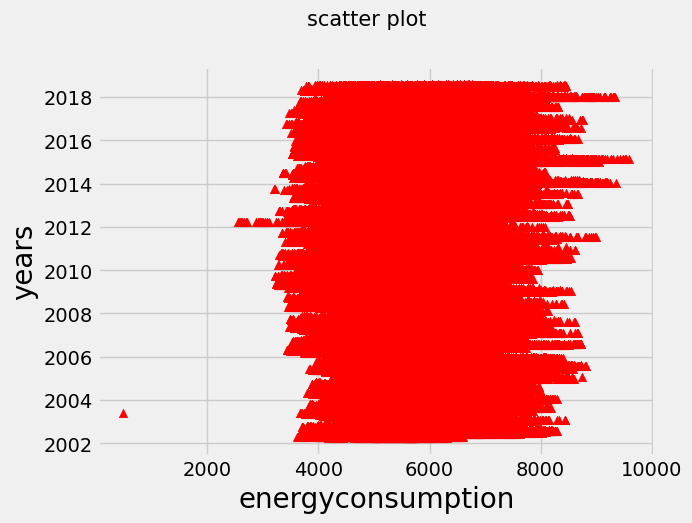

In [23]:
plt.scatter(df.energyconsumption,df.index,marker='^',c='r')
plt.suptitle('scatter plot',size=15,y=1)
plt.xlabel('energyconsumption',size=20,y=1)
plt.ylabel('years',size=20,y=0.5)

(array([1.0000e+00, 0.0000e+00, 2.9900e+02, 2.0592e+04, 5.1618e+04,
        4.5885e+04, 2.0394e+04, 4.1710e+03, 2.4600e+02]),
 array([ 487.        , 1498.88888889, 2510.77777778, 3522.66666667,
        4534.55555556, 5546.44444444, 6558.33333333, 7570.22222222,
        8582.11111111, 9594.        ]),
 <BarContainer object of 9 artists>)

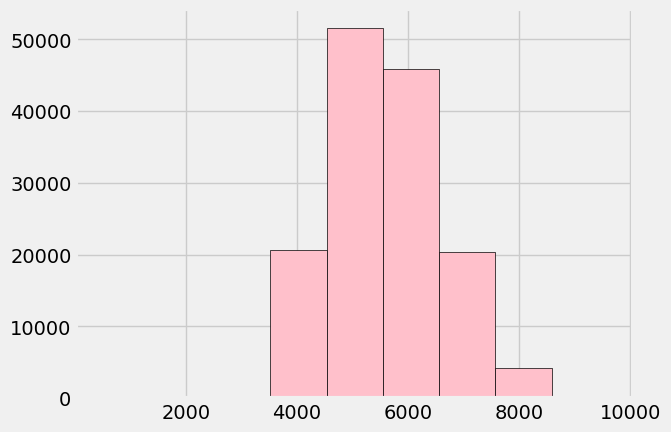

In [24]:
plt.hist(df['energyconsumption'],facecolor='pink',edgecolor='black',bins=9,rwidth=1)

<Axes: >

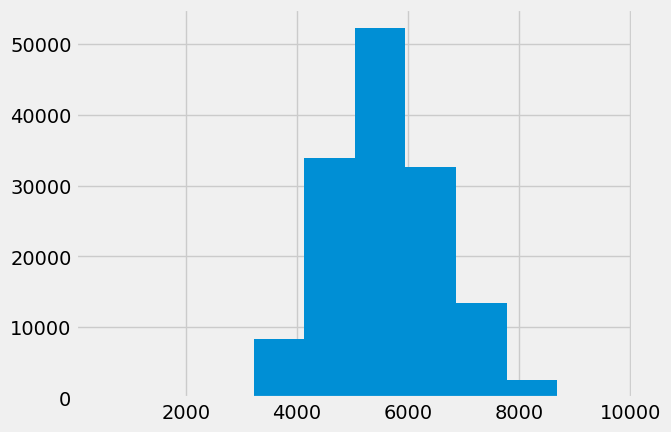

In [25]:
# Viewing the spread of data using a histogram

df['energyconsumption'].hist()

Since we are dealing with a time series data. We need to check for following factors in the data

(a) Stationarity - To check whether our data has a constant mean,constant variance and autocovariance does not depend on time.

(b) Autocorrelation - It refers to the degree of similarity between a given time series and lagged version of itself.

STATIONARITY

There are 2 ways to check stationarity of the data

1. Plotting the rolling statistics

2. Dickey Fuller Test

<Axes: xlabel='Datetime'>

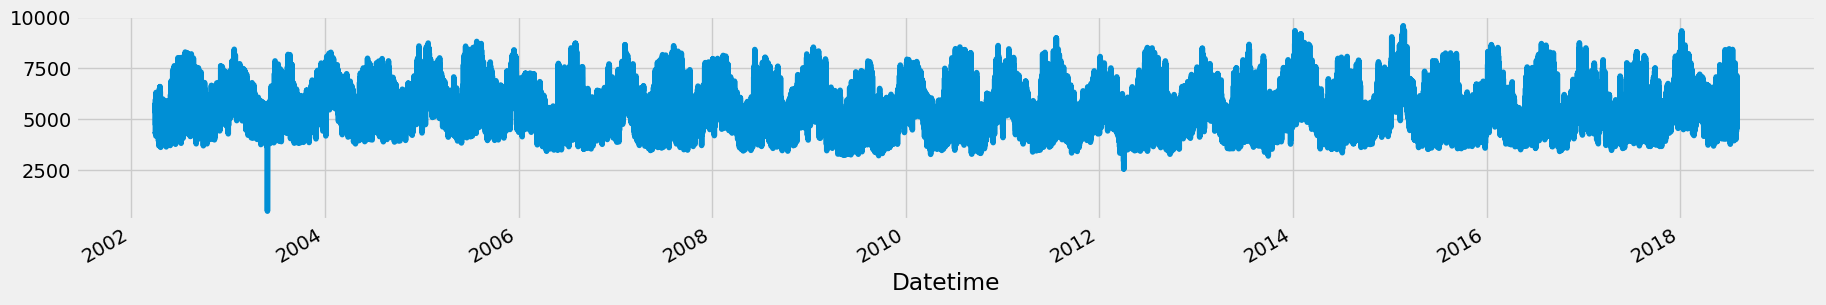

In [26]:
#1. Plotting the rolling statistics

plt.rcParams["figure.figsize"] = (20,3)
df['energyconsumption'].plot()

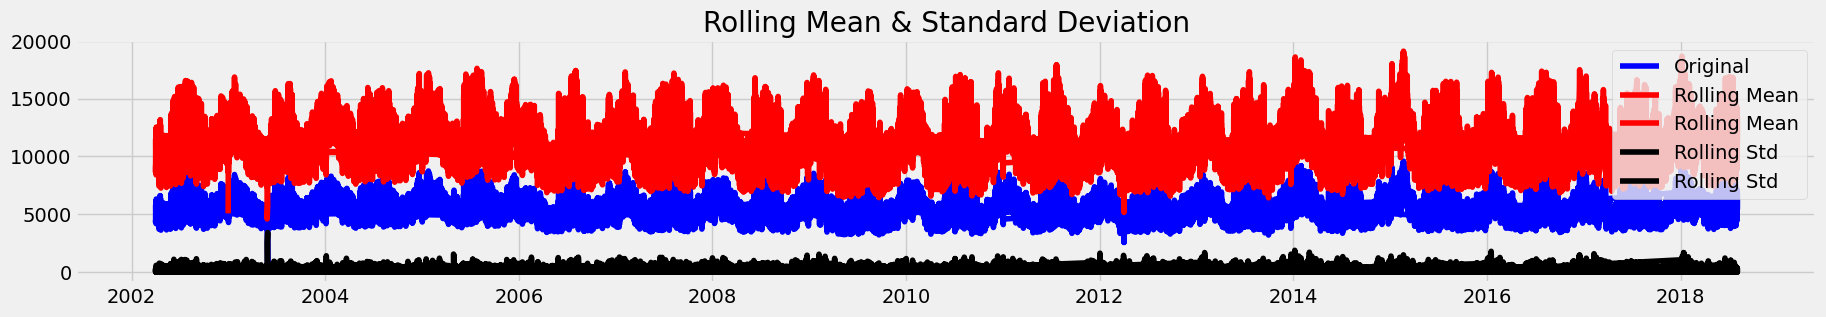

In [27]:
#Determing rolling statistics
roll_mean=df.rolling(2, min_periods=1).sum()
roll_std =df.rolling(2, min_periods=1).std()

#Plot rolling statistics:
orig = plt.plot(df['energyconsumption'], color='blue',label='Original')
mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
std = plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Looking at the graph we cannot any increase in either mean or standard deviation of the data. However,to be very clear about the data we need to use the Dickey Fuller test



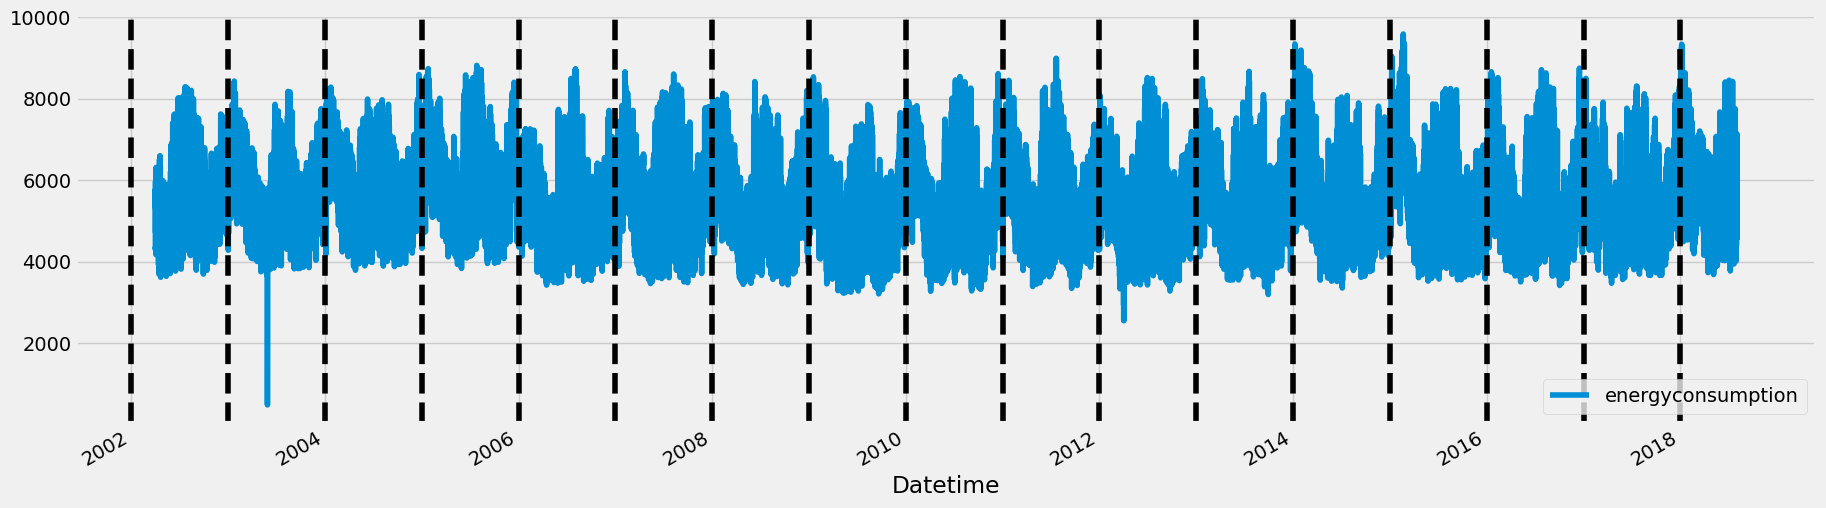

In [28]:
ax = df.plot( y='energyconsumption', figsize=(20,6))
xcoords = ['2002-01-01','2003-01-01', '2004-01-01','2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01','2009-01-01','2010-01-01','2011-01-01','2012-01-01',
          '2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

In [29]:

from statsmodels.tsa.stattools import adfuller

In [30]:
import numpy
numpy.__version__

'1.23.0'

In [31]:
import numpy as np
np.__version__

'1.23.0'

In [32]:
pip install numpy==1.23

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install --downgrade numpy==1.10.1

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\govin\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\govin\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\govin\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\govin\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\govin\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --downgrade


In [34]:
import numpy as np
machar = np.MachAr(float_conv=numpy.float32)
print(machar)
#Machine parameters for Python floating point number

Machine parameters for Python floating point number
---------------------------------------------------------------------
ibeta=2 it=23 iexp=8 ngrd=0 irnd=5
machep=-23     eps=  1.1920928955078125e-07 (beta**machep == epsilon)
negep =-24  epsneg=  5.9604644775390625e-08 (beta**epsneg)
minexp=-126   xmin=  1.1754943508222875e-38 (beta**minexp == tiny)
maxexp=128    xmax=  3.4028234663852886e+38 ((1-epsneg)*beta**maxexp == huge)
smallest_normal=1.1754943508222875e-38    smallest_subnormal=1.401298464324817e-45
---------------------------------------------------------------------



In [35]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [36]:
#2. Dickey Fuller Test

print ('Results of Dickey-Fuller Test:')
adf_test = adfuller(df['energyconsumption'],autolag='AIC')
dfoutput = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in adf_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    -19.530979
p-value                             0.000000
#Lags Used                         74.000000
Number of Observations Used    143131.000000
Critical Value (1%)                -3.430396
Critical Value (5%)                -2.861560
Critical Value (10%)               -2.566781
dtype: float64


Our p-value is definitely less than 0.5 and so we can say with pretty good confidence that we can reject the null (unit root, non-stationary data) and can assume our data is stationary.

# LAG PLOT

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

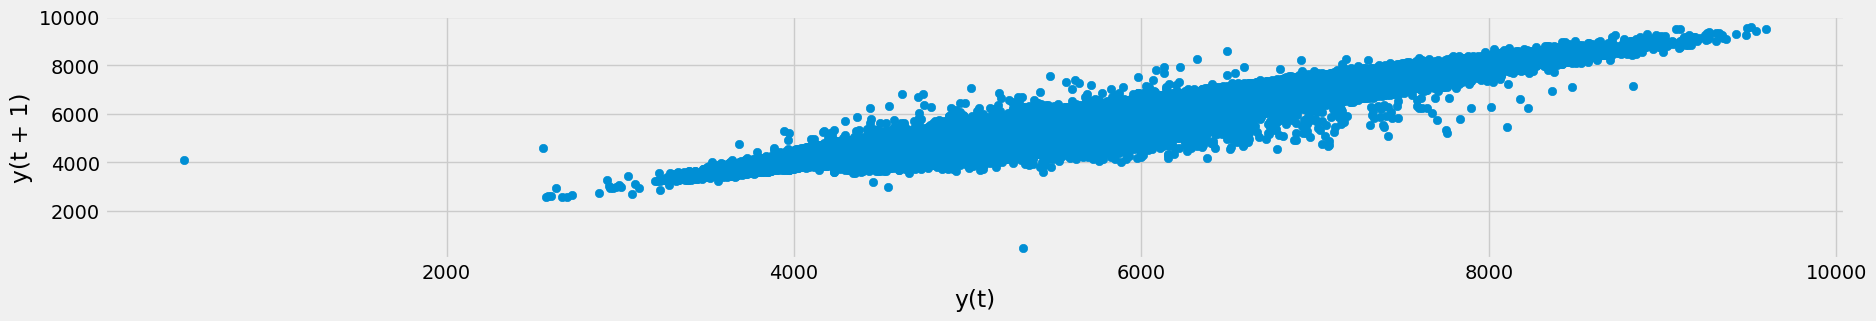

In [37]:
pd.plotting.lag_plot(df['energyconsumption'],lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 3)'>

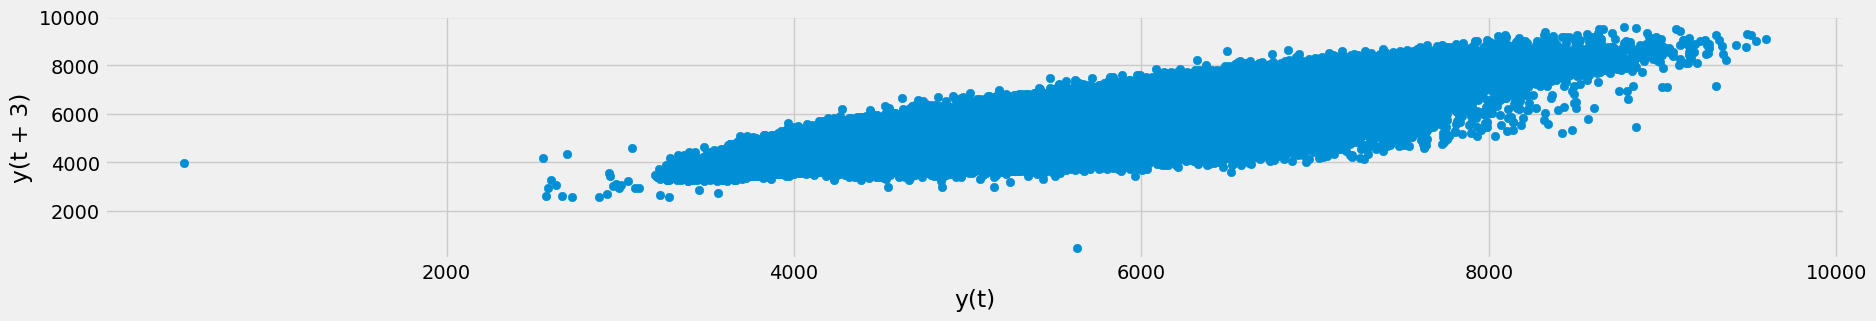

In [38]:
pd.plotting.lag_plot(df['energyconsumption'],lag=3)

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

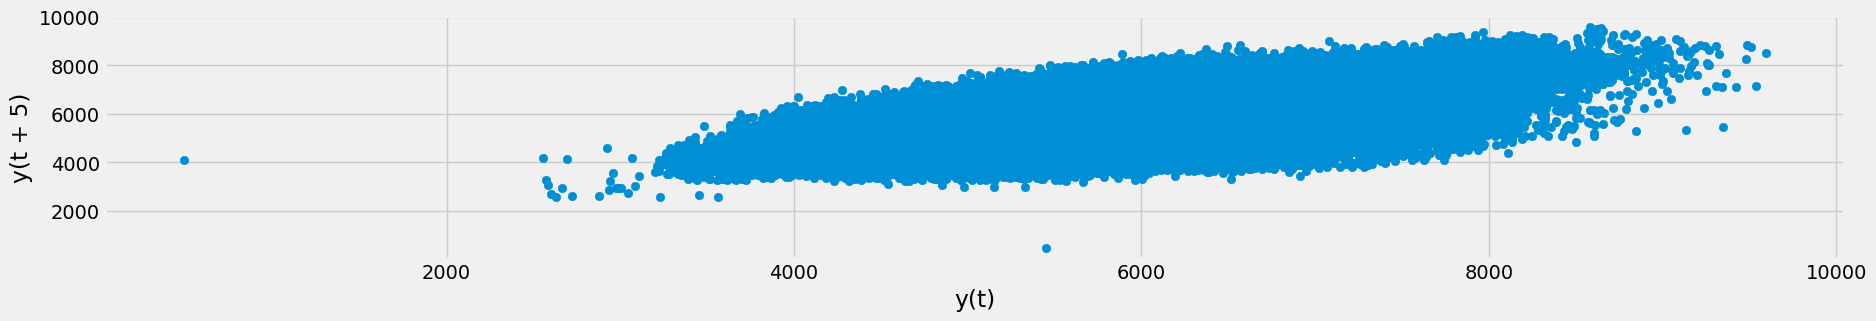

In [39]:
pd.plotting.lag_plot(df['energyconsumption'],lag=5)

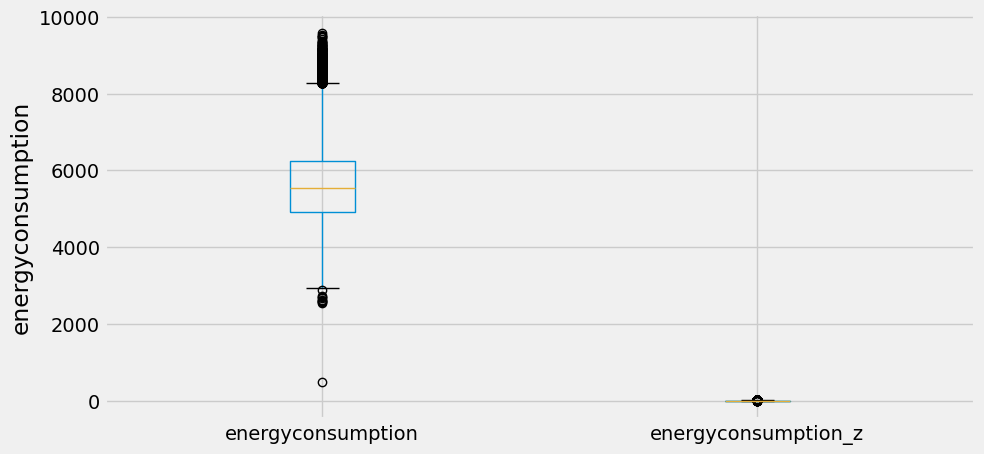

In [41]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.ylabel('energyconsumption')
plt.show()

<Axes: title={'center': 'PJMw energy use in mgw'}, xlabel='Datetime'>

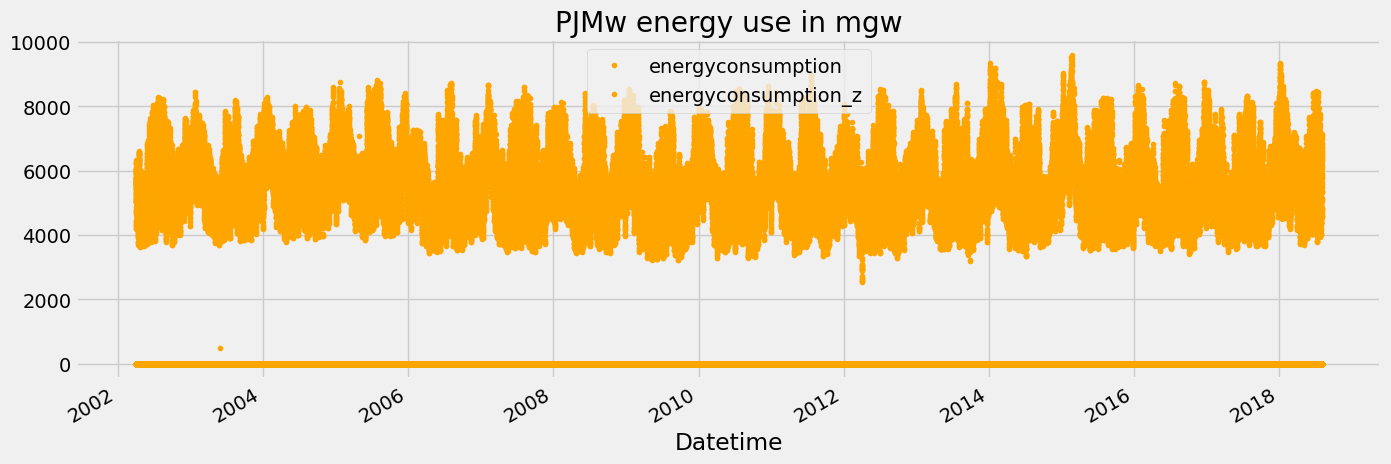

In [39]:
df.plot(style='.', figsize=(15,5), color="orange", title='PJMw energy use in mgw')

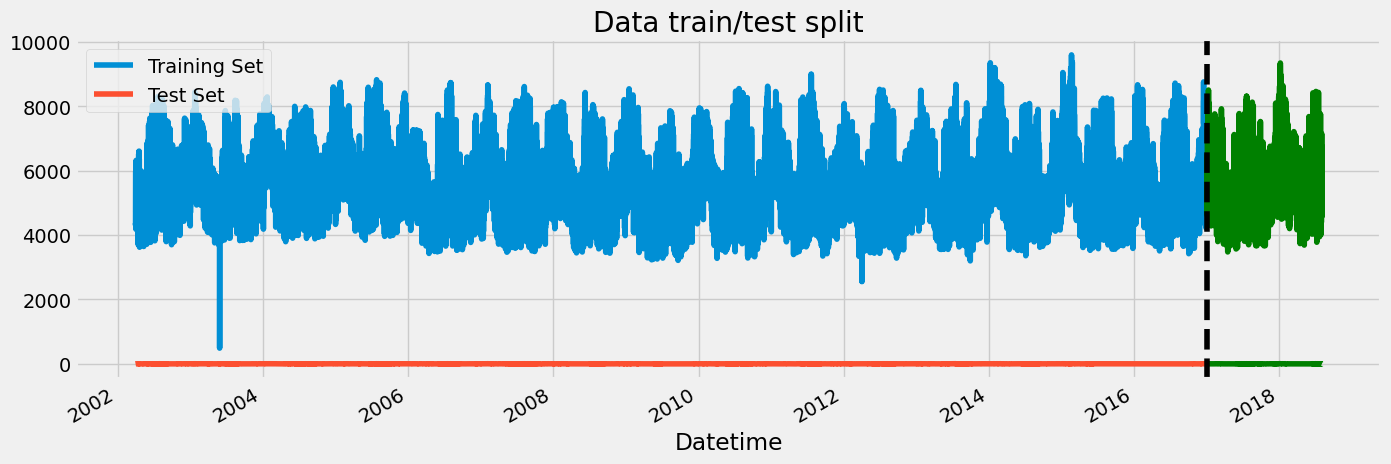

In [40]:
#since we have 17 years data , dividing it into test an train data 
#2002 to 2016 train data & 2017 to 2018 test data
train=df.loc[df.index<'01-01-2017']
test=df.loc[df.index >= '01-01-2017']

fig, ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set', title="Data train/test split")
test.plot(ax=ax, label='Test set', color="green")
ax.axvline('01-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

blue color is for train data &
green color is for test data

In [41]:
print(train.shape)
print(test.shape)

(129310, 2)
(13896, 2)


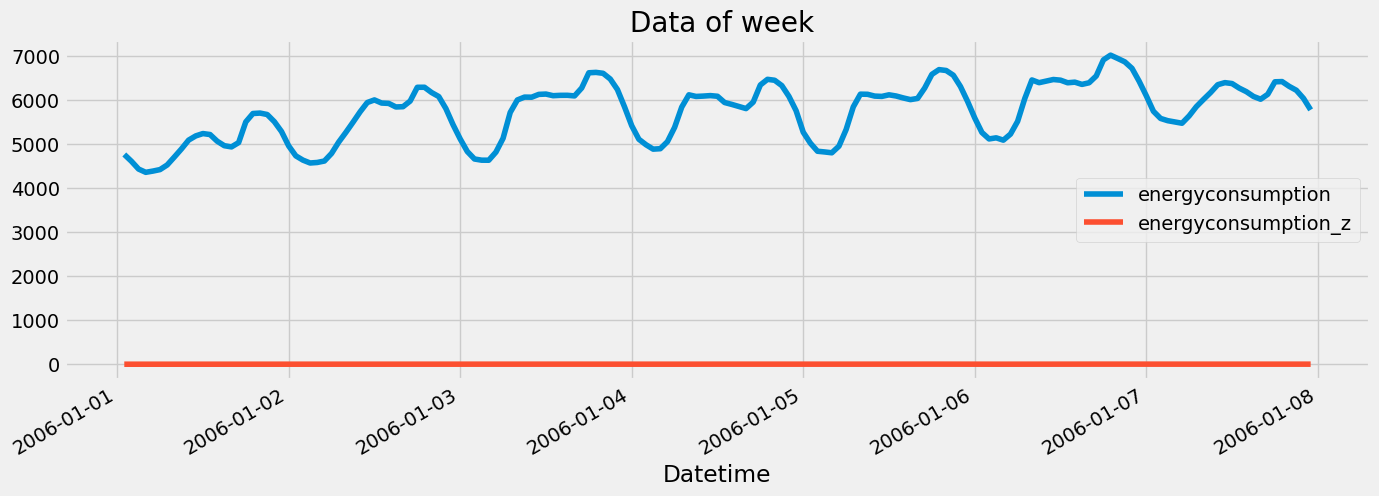

In [42]:
#look at what one single week of data looks like
df.loc[(df.index > '01-01-2006') & (df.index < '01-08-2006')]\
.plot(figsize=(15,5), title=" Data of week", )

plt.show()

In [43]:
def create_features(df):
    
    df=df.copy()
    df['hour']=df.index.hour
    df['dayofweek']=df.index.dayofweek
    df['quarter']=df.index.quarter
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df


dfcat=create_features(df)

In [44]:
dfcat

,energyconsumption,energyconsumption_z,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,,
2002-12-31 01:00:00,5077,-0.536566,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,4939,-0.677506,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,4885,-0.732656,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,4857,-0.761253,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,4930,-0.686698,5,1,4,12,2002,365,31,1
...,...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,8401,2.858240,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,8373,2.829643,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,8238,2.691767,22,0,1,1,2018,1,1,1


In [47]:
print(dfcat.shape)

(143206, 10)


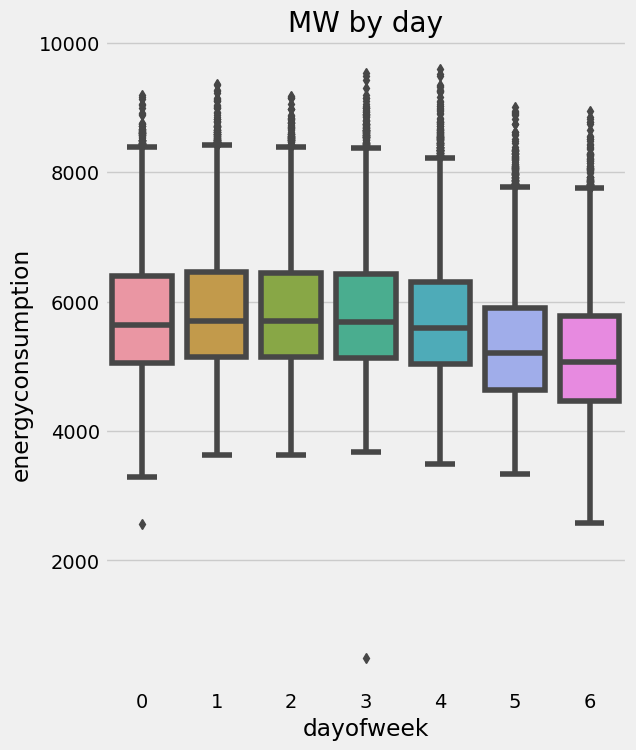

In [49]:
fig, ax=plt.subplots(figsize=(6,8))
sns.boxplot(data=dfcat, x='dayofweek', y='energyconsumption')
ax.set_title('MW by day')
plt.show()

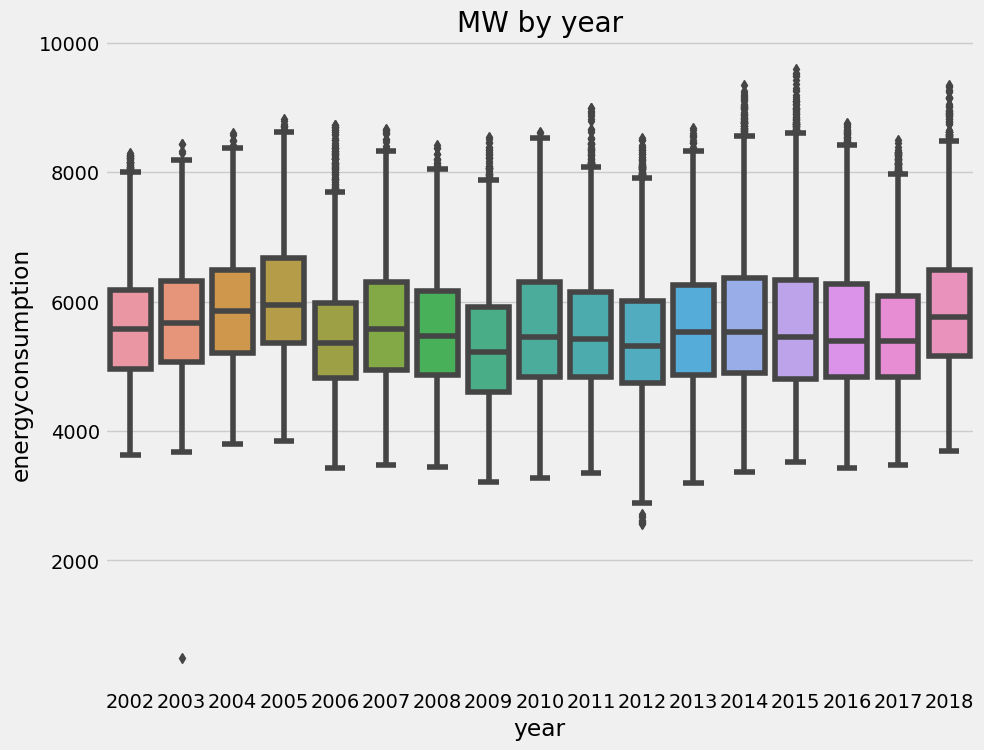

In [50]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=dfcat, x='year', y='energyconsumption')
ax.set_title('MW by year')
plt.show()

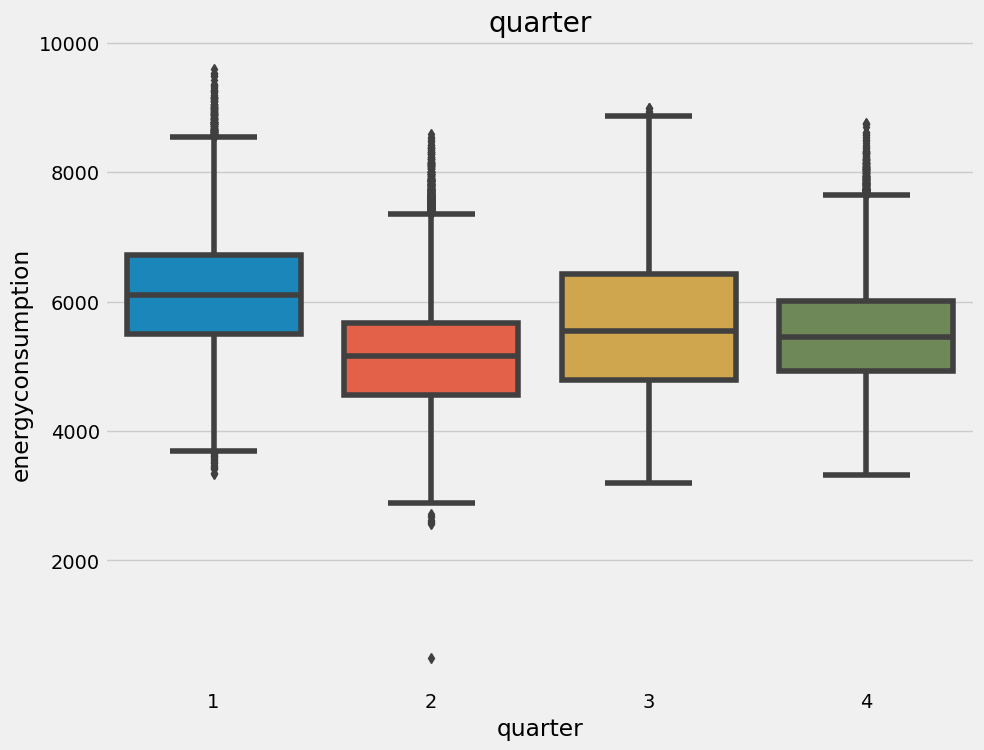

In [51]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=dfcat, x='quarter', y='energyconsumption')
ax.set_title('quarter')
plt.show()

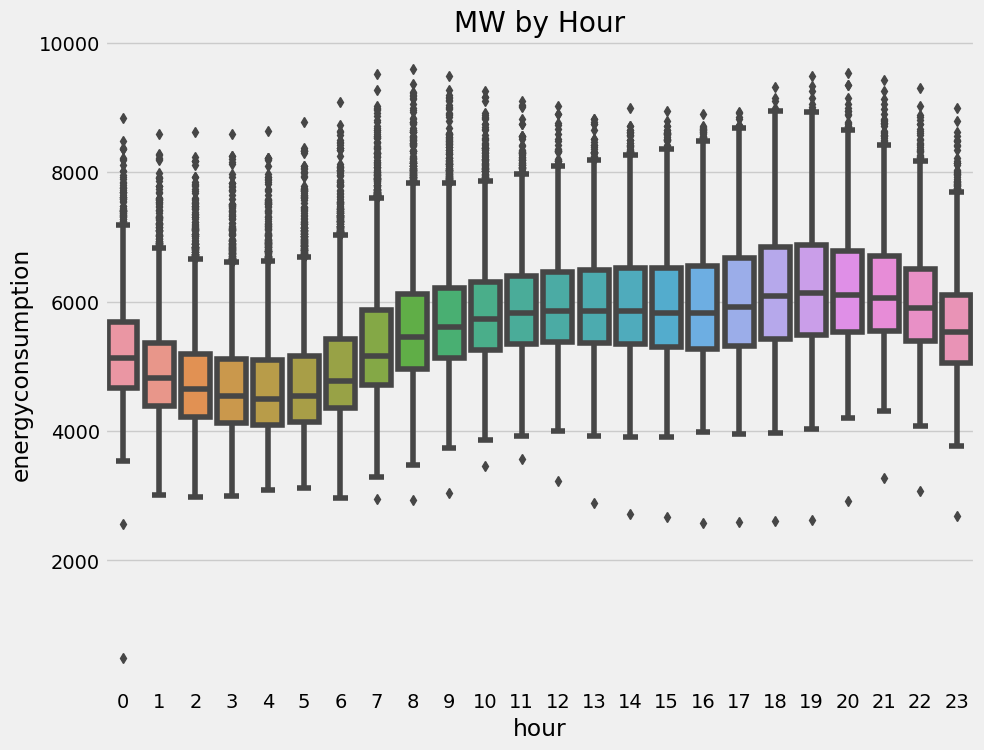

In [52]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=dfcat, x='hour', y='energyconsumption')
ax.set_title('MW by Hour')
plt.show()

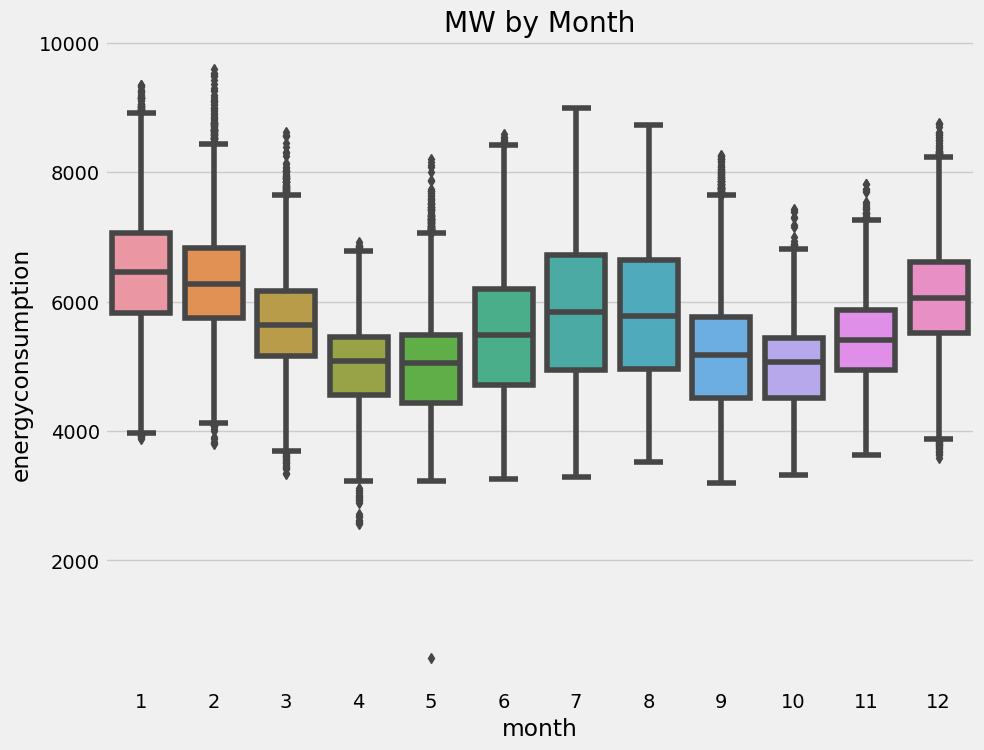

In [53]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=dfcat, x='month', y='energyconsumption')
ax.set_title('MW by Month')
plt.show()

In [54]:
train = create_features(train)
test = create_features(test)

FEATURES=['hour','dayofweek', 'quarter','month','year','dayofyear']
TARGET='energyconsumption'

In [55]:
X_train=train[FEATURES]
y_train=train[TARGET]

X_test=test[FEATURES]
y_test=test[TARGET]

In [56]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[18:45:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5628.04233	validation_1-rmse:5656.77220
[100]	validation_0-rmse:2157.67039	validation_1-rmse:2171.47811
[200]	validation_0-rmse:982.00791	validation_1-rmse:1036.61790
[300]	validation_0-rmse:652.52541	validation_1-rmse:760.99178
[400]	validation_0-rmse:568.58464	validation_1-rmse:706.47670
[500]	validation_0-rmse:542.04614	validation_1-rmse:697.36130
[600]	validation_0-rmse:527.98187	validation_1-rmse:695.40516
[700]	validation_0-rmse:518.70068	validation_1-rmse:694.49174
[800]	validation_0-rmse:511.72273	validation_1-rmse:691.79912
[890]	validation_0-rmse:505.01576	validation_1-rmse:691.68666


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

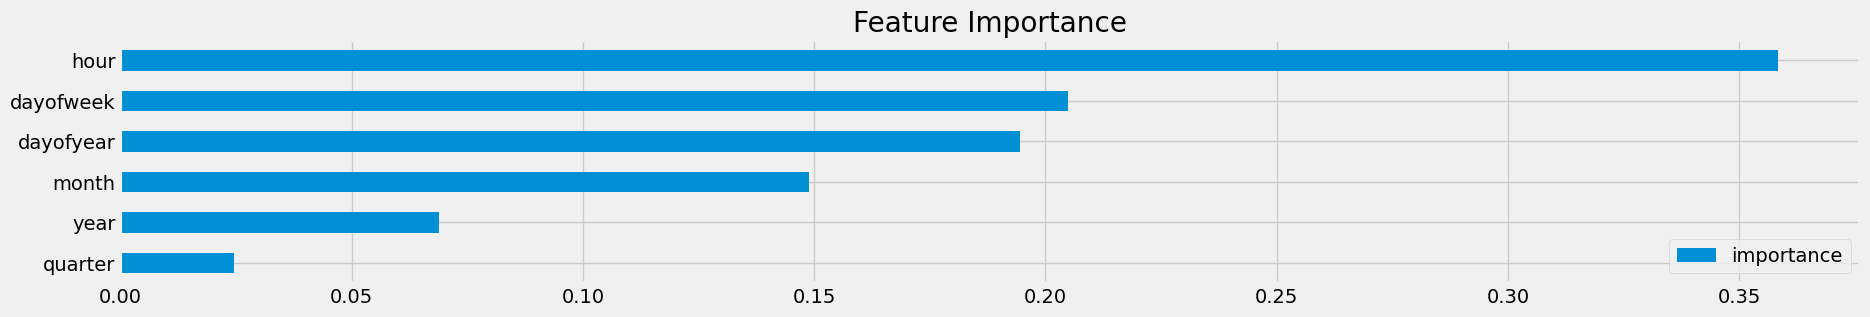

In [57]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

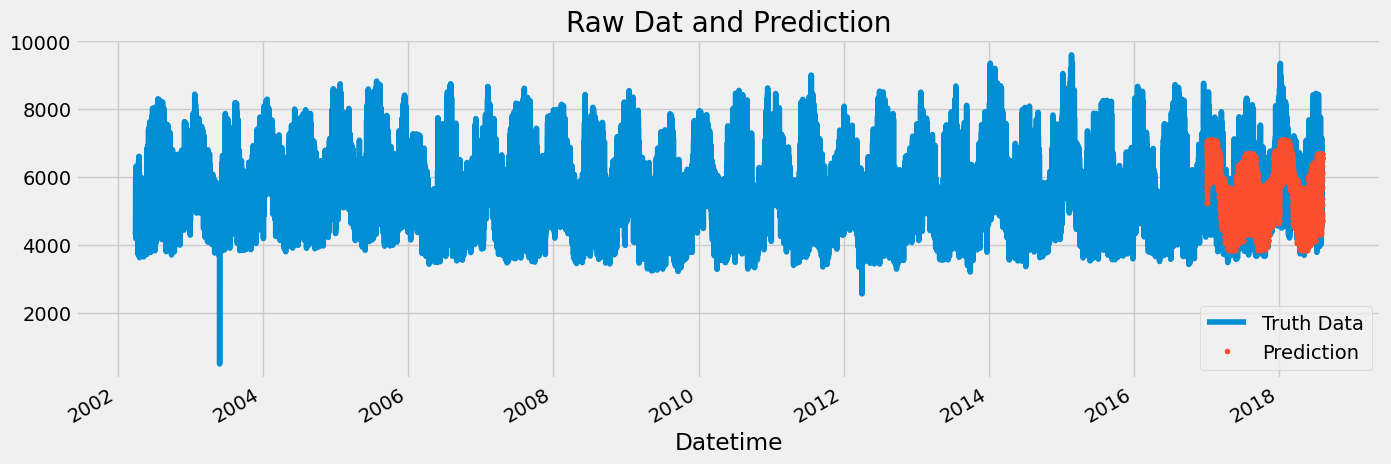

In [59]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['energyconsumption']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Prediction'])
ax.set_title('Raw Dat and Prediction')
plt.show()

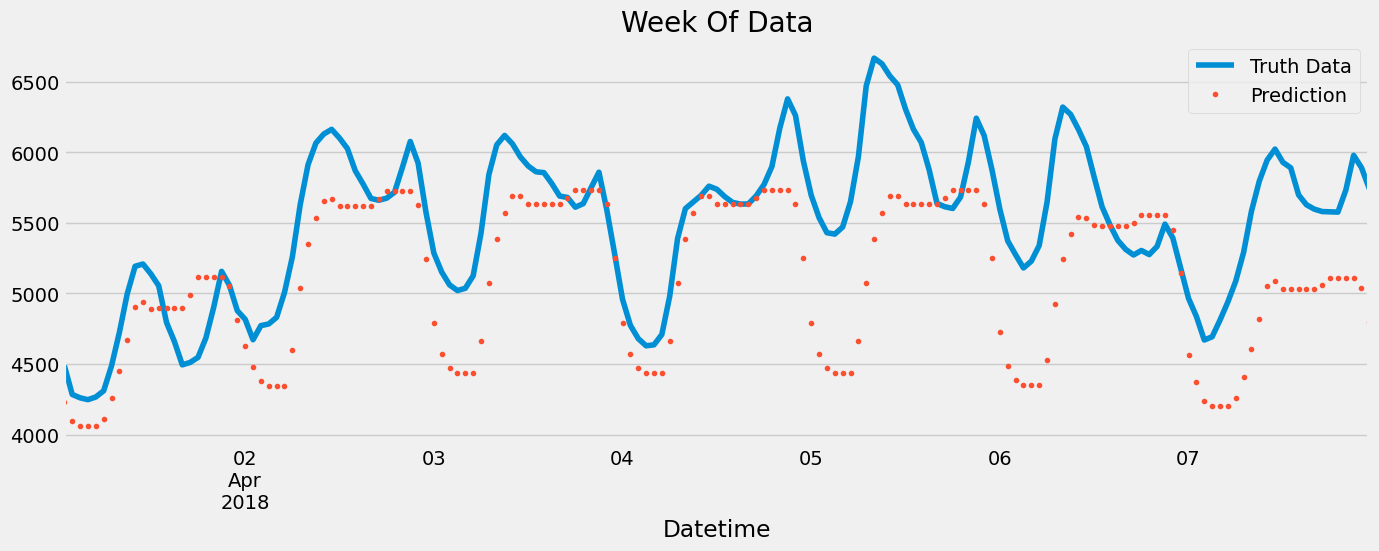

In [60]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['energyconsumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [61]:
score = np.sqrt(mean_squared_error(test['energyconsumption'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 690.08


In [62]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2018-01-06    2333.359721
2017-12-31    2290.906637
2018-01-05    2174.541585
2017-12-28    2103.494141
2018-01-07    1960.879415
2017-12-29    1855.771342
2018-01-01    1764.644450
2017-12-30    1733.168925
2017-03-15    1700.467753
2017-02-24    1658.042013
Name: error, dtype: float64